In [1]:
import pandas as pd

In [2]:
from ydata_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt

/Users/puneet/anaconda3/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/puneet/anaconda3/lib/python3.11/site-packages/visions/backends/shared/nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


In [3]:
import seaborn as sns
%matplotlib inline

In [20]:
df = pd.read_csv('~/Documents/MSDS_VaishaliWork/MSDS670_DataVisualisation/Week5/bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [102]:
df['campaign'].unique()

array([ 1,  2,  3,  4,  6,  5,  8, 11,  9, 10, 15, 12, 14,  7, 24, 13, 17,
       29, 21, 20, 16, 32, 19, 25, 22, 43, 18, 41, 63, 27, 30, 26, 23, 28,
       33, 31])

In [109]:
df['poutcome'].unique()

array(['unknown', 'failure', 'success', 'other'], dtype=object)

# Box Plot or Whisker Plot to check outliers

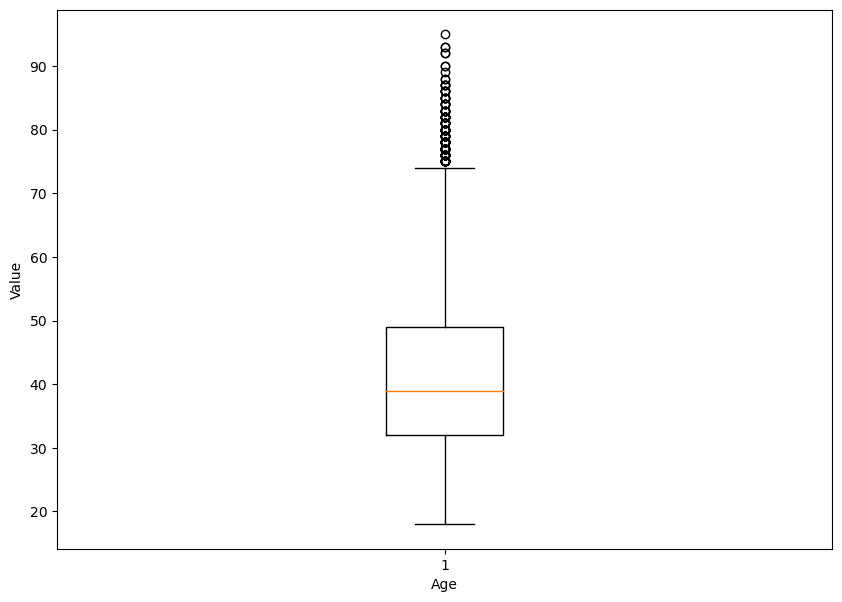

In [5]:
# Outliers for age column

fig = plt.figure(figsize =(10, 7))
plt.xlabel('Age')
plt.ylabel('Value')
# Creating plot
plt.boxplot(df['age'])
 
# show plot
plt.show()

Some outliers exist after 70 years of age. We can remove these records.

In [6]:
# Keeping only the age less than or equal to 70 to remove the outliers

df = df[df['age'] <= 70]
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


# Taking only positive balances

In [7]:
df = df[df['balance'] >0]
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11154,52,technician,married,tertiary,no,523,yes,yes,cellular,8,jul,113,1,-1,0,unknown,no
11155,35,blue-collar,married,secondary,no,80,yes,yes,cellular,21,nov,38,2,172,2,failure,no
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no


# Creating a customized histogram with a density plot

Text(0.5, 1.0, 'Age and Term deposit')

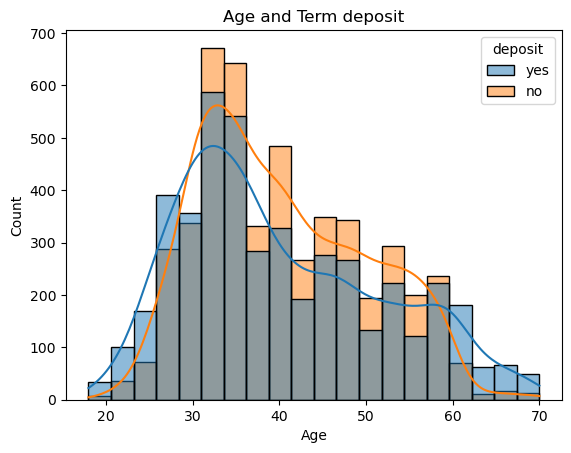

In [10]:
sns.histplot(data=df,x=df['age'],hue='deposit',bins=20, kde = True)

# Adding labels and title

plt.xlabel('Age')
plt.title('Age and Term deposit')

# Comparison of Marital Status, Housing with Loan status

/Users/puneet/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


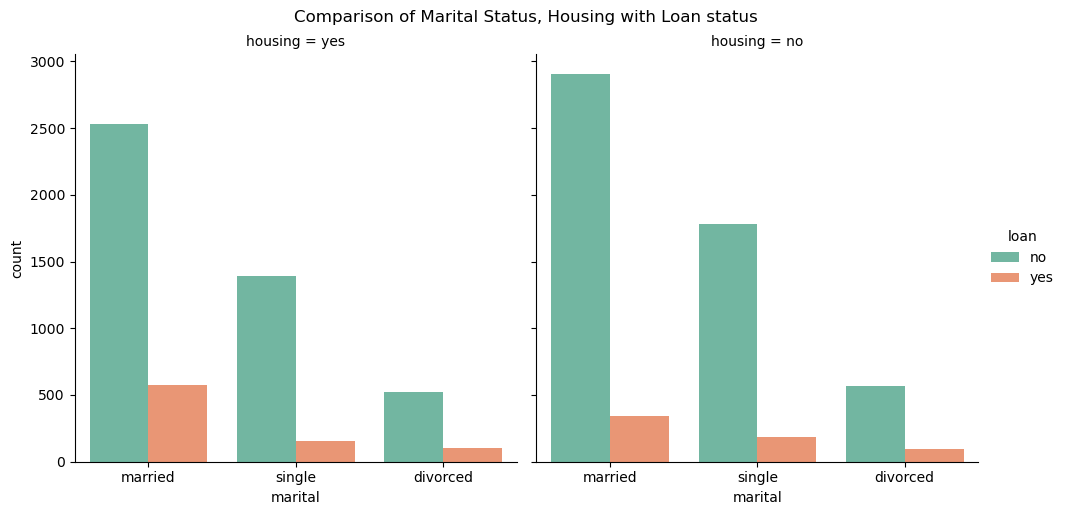

In [84]:
# Bar Graph 

sns.catplot(x='marital', hue='loan', col='housing', data=df, kind='count', palette='Set2', col_wrap=2)
plt.suptitle('Comparison of Marital Status, Housing with Loan status', y=1.02)
plt.show()

# Balance distribution

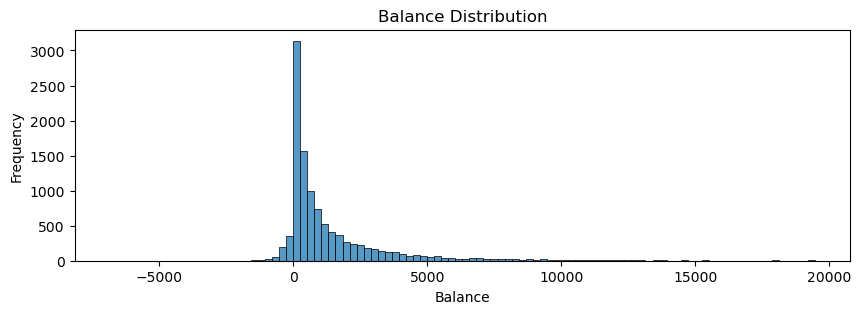

In [12]:
plt.figure(figsize=(10, 3))
sns.histplot(df[df['balance'] < 20000]['balance'], bins=100, kde=False)
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

# Checking distribution of day, duration, campaign, previous and pdays

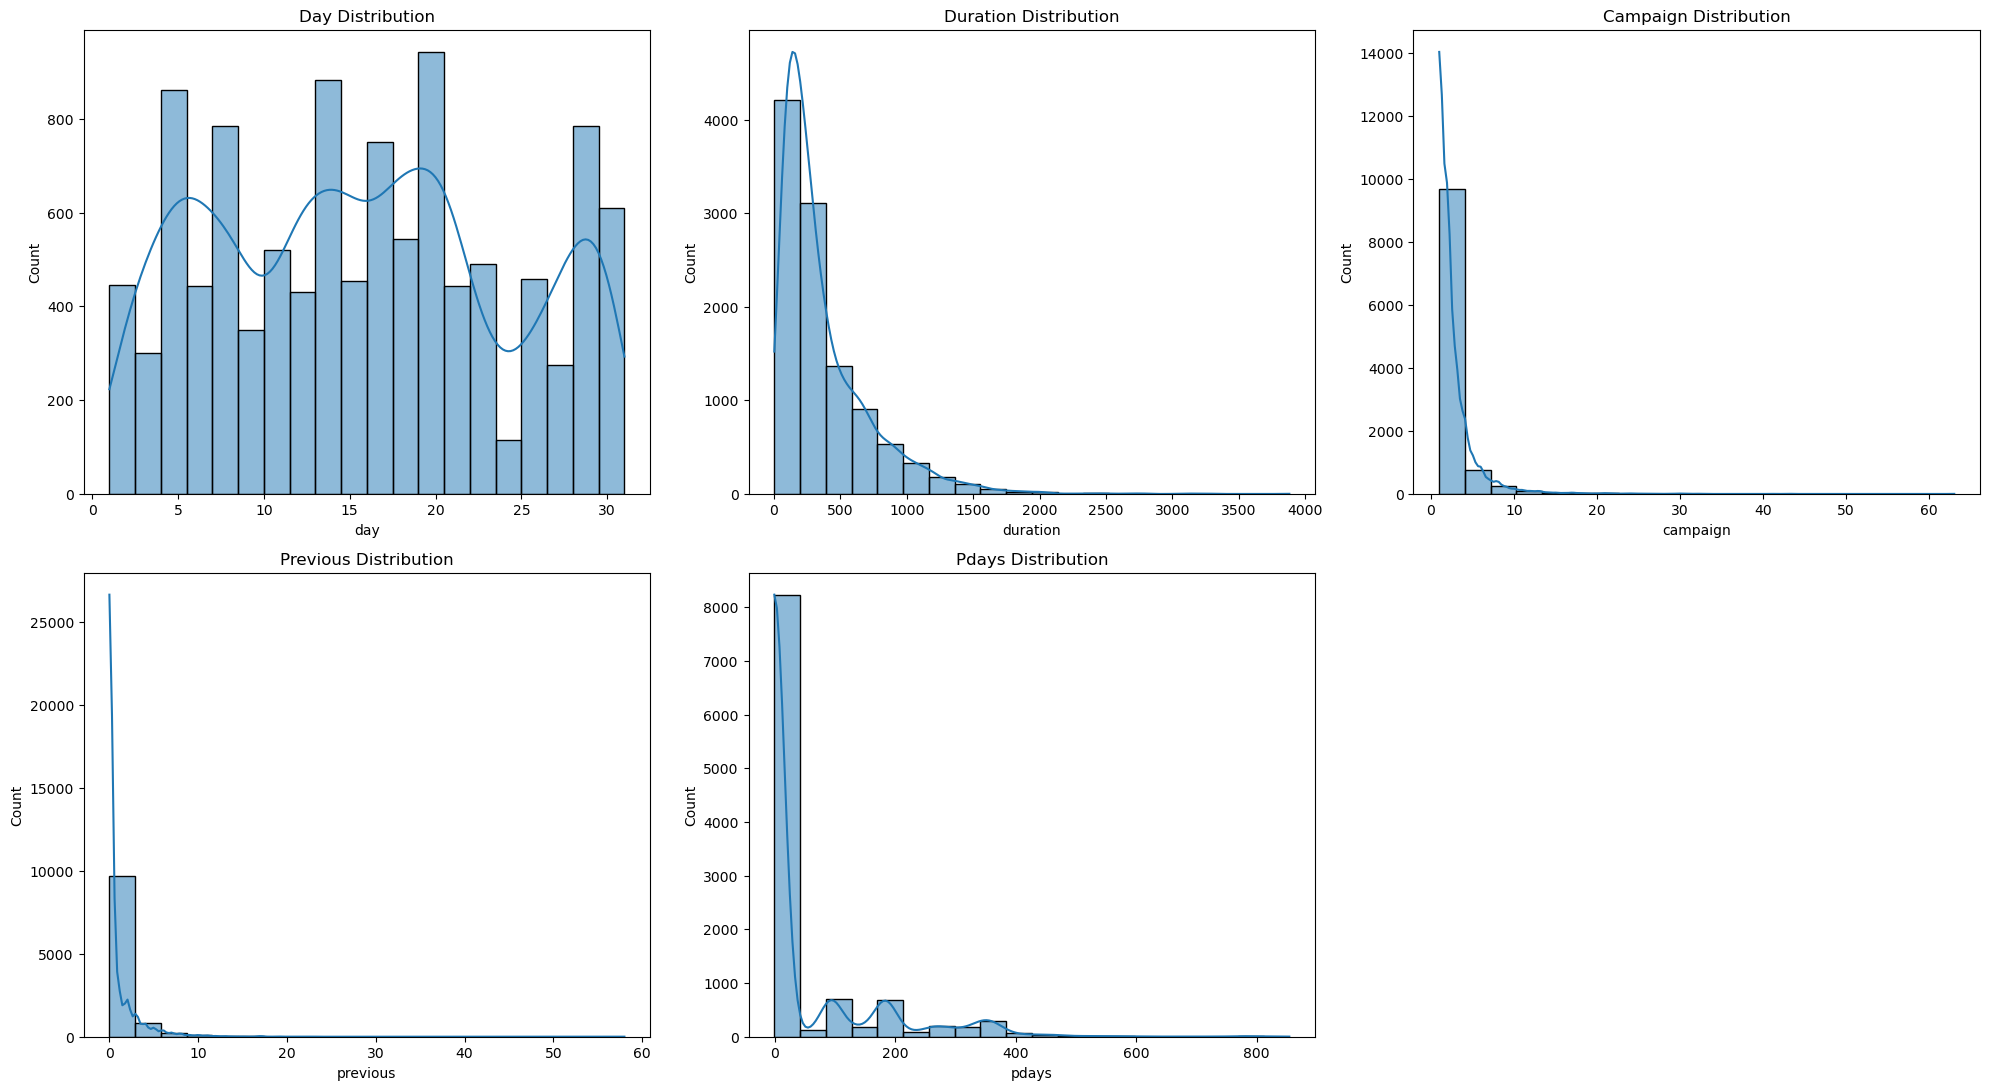

In [13]:
features = ['day', 'duration', 'campaign', 'previous', 'pdays']

plt.figure(figsize=(20, 16))

for i, feature in enumerate(features, start=1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], bins=20, kde=True)
    plt.title(f'{feature.capitalize()} Distribution')

plt.tight_layout()
plt.show()

# Day and duration impact on deposit

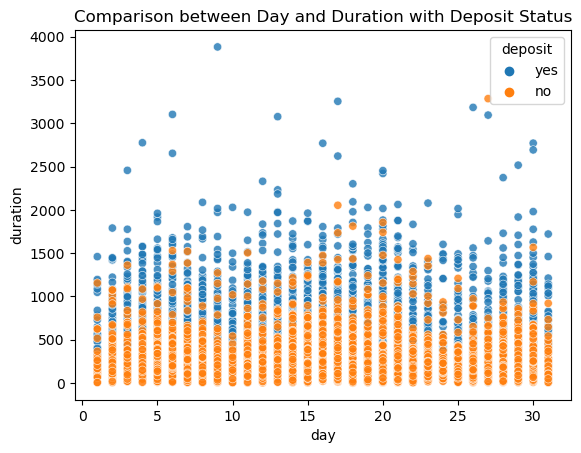

In [14]:
sns.scatterplot(x='day', y='duration', data=df, hue='deposit', alpha=0.8)
plt.title('Comparison between Day and Duration with Deposit Status')
plt.show()

# Previous outcome and deposit as hue

/Users/puneet/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


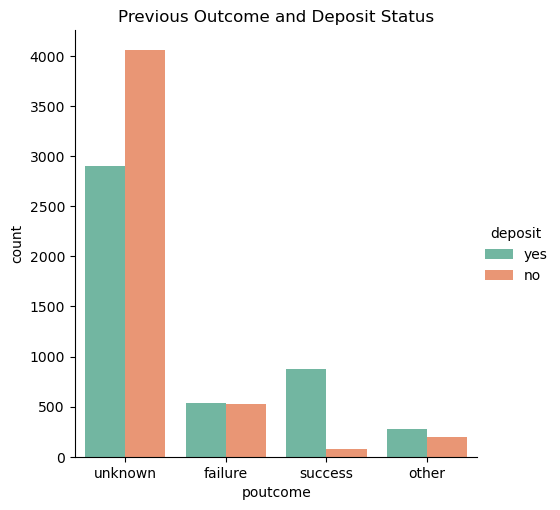

In [8]:
sns.catplot(x='poutcome', hue='deposit', data=df, kind='count', palette='Set2', aspect=1)
plt.title('Previous Outcome and Deposit Status')
plt.show()

# Bar Plots for Categorical column "job" with target "termdeposit" as hue

<Axes: title={'center': 'Job and Term Deposit'}, xlabel='job'>

<Figure size 1000x600 with 0 Axes>

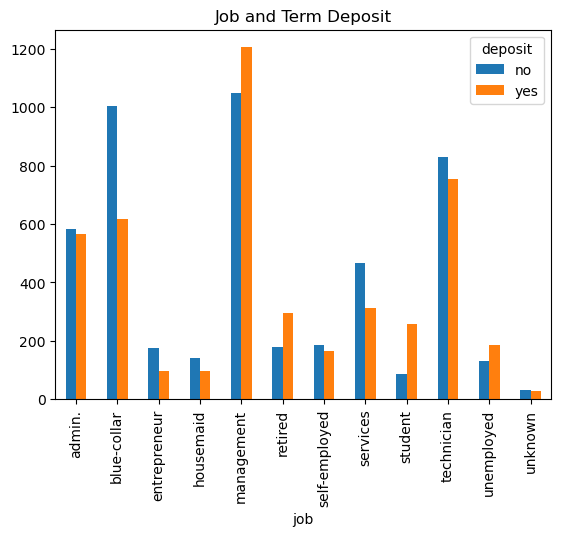

In [9]:
fig = plt.figure(figsize=(10, 6)) 
pd.crosstab(df['job'],df['deposit']).plot(kind = 'bar', title = "Job and Term Deposit")

People in management and technical jobs have subscribed most for the deposits.

# Corelation matrix for numeric columns - heatmap

In [31]:
df_new = df

In [32]:
df_new

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [33]:
# dropping categorical columns

drop_col = ['balance','education','job','marital','housing','loan','contact','deposit','default','month','poutcome']
df_new.drop(drop_col, axis=1, inplace=True) 

/var/folders/px/skdltfh504v5prt3s97v9j240000gn/T/ipykernel_6970/1064750259.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(drop_col, axis=1, inplace=True)


In [34]:
df_new

,age,day,duration,campaign,pdays,previous
0,59,5,1042,1,-1,0
1,56,5,1467,1,-1,0
2,41,5,1389,1,-1,0
3,55,5,579,1,-1,0
4,54,5,673,2,-1,0
...,...,...,...,...,...,...
11157,33,20,257,1,-1,0
11158,39,16,83,4,-1,0
11159,32,19,156,2,-1,0
11160,43,8,9,2,172,5


In [21]:
# dropping columns

drop_col = ['deposit']
df_new.drop(drop_col, axis=1, inplace=True) 

/var/folders/px/skdltfh504v5prt3s97v9j240000gn/T/ipykernel_6970/361964159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(drop_col, axis=1, inplace=True)


In [21]:
df[df['deposit'] == 'yes']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5284,78,retired,divorced,primary,no,1389,no,no,cellular,8,apr,335,1,-1,0,unknown,yes
5285,30,management,single,tertiary,no,398,no,no,cellular,27,oct,102,1,180,3,success,yes
5286,69,retired,divorced,tertiary,no,247,no,no,cellular,22,apr,138,2,-1,0,unknown,yes
5287,48,entrepreneur,married,secondary,no,0,no,yes,cellular,28,jul,431,2,-1,0,unknown,yes


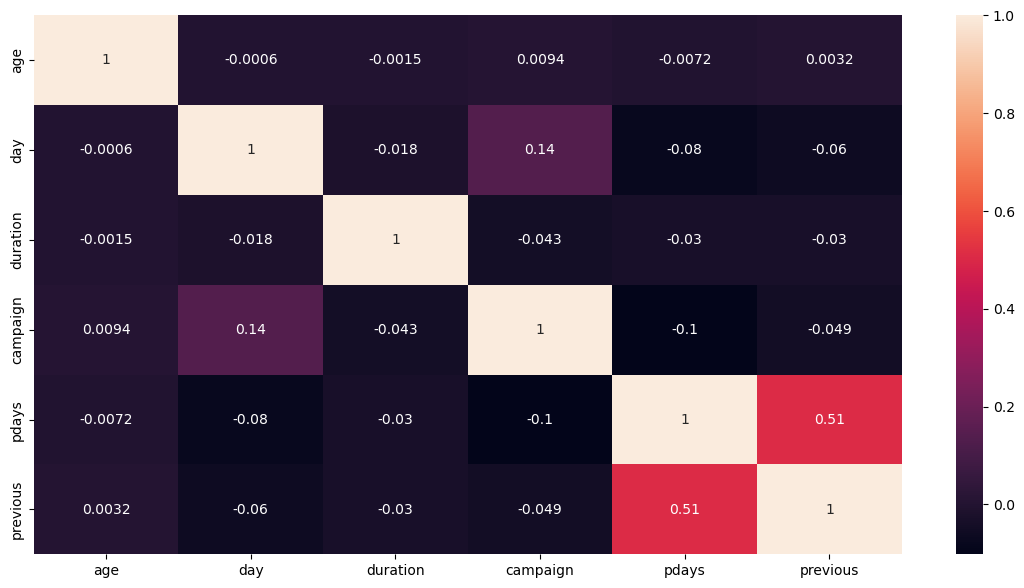

In [89]:
plt.figure(figsize = (14,7))
cor = df_new.corr()
sns.heatmap(cor,annot = True)    # To see the correlations
plt.show()

Campaign success -- 5289 deposits out of 11162 records.

# Sum of balance in each month

In [47]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


# Monthly sum of balance

In [48]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [65]:
df.groupby(['month'], as_index=False)['balance'].sum().sort_values(by='month',ascending=True)

,month,balance
0,apr,1600726
1,aug,2401346
2,dec,300873
3,feb,1216897
4,jan,395976
5,jul,1606539
6,jun,1956674
7,mar,584735
8,may,3367218
9,nov,2215965


In [67]:
bal = [395976,1216897,584735,1600726,3367218,1956674,1606539,2401346,615866,798732,2215965,300873]

In [14]:
mon = ['Jan','Feb','March','April','May','June','July','August','Sep','Oct','Nov','Dec']

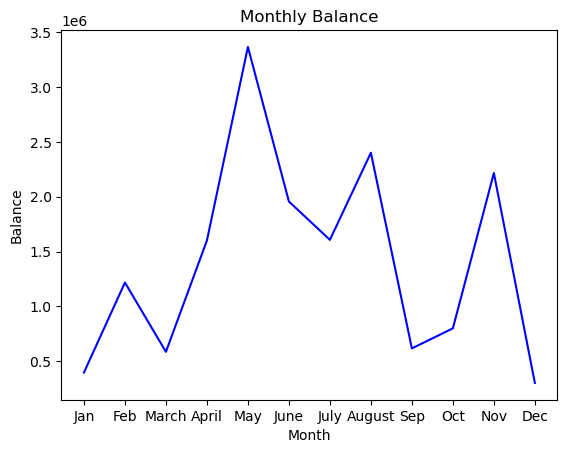

In [79]:
plt.xlabel("Month")
plt.ylabel("Balance")
plt.title("Monthly Balance")
plt.plot(mon, bal, color = 'blue',
         linestyle = 'solid');

# Month and maximum duration of deposit

In [12]:
df.groupby(['month'], as_index=False)['duration'].max().sort_values(by='month',ascending=True)

,month,duration
0,apr,2053
1,aug,2372
2,dec,2062
3,feb,3102
4,jan,2770
5,jul,2692
6,jun,3881
7,mar,3076
8,may,3094
9,nov,2453


In [16]:
dur = [2770,3102,3076,2053,3094,3881,2692,2372,1962,3284,2453,2062]

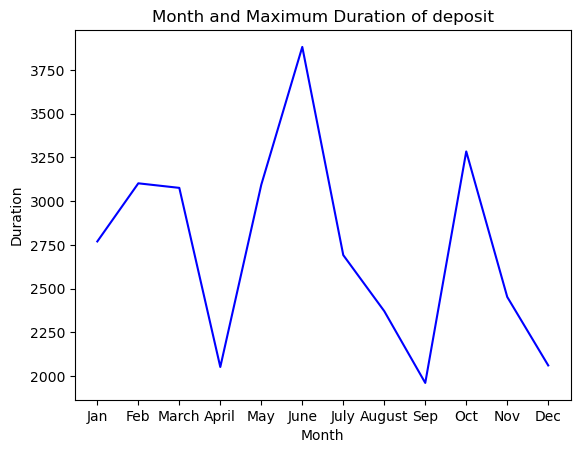

In [17]:
plt.xlabel("Month")
plt.ylabel("Duration")
plt.title("Month and Maximum Duration of deposit")
plt.plot(mon, dur, color = 'blue',
         linestyle = 'solid');

June Month has the deposits with maximum duration.